In [1]:
import numpy as np
import matplotlib.pyplot as plt


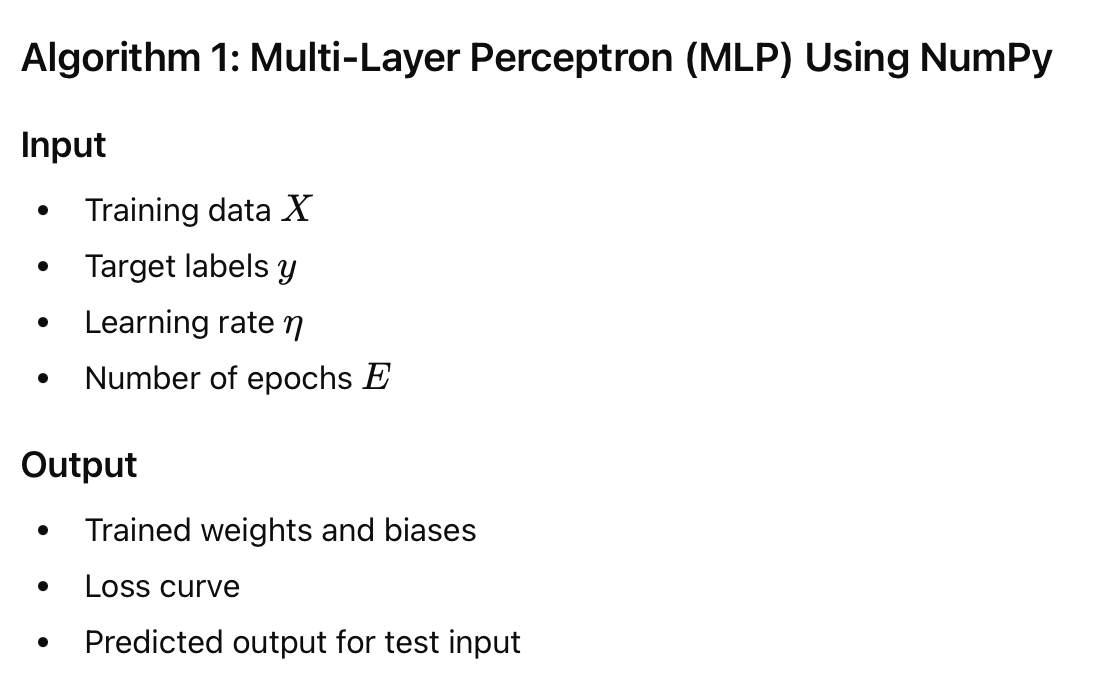
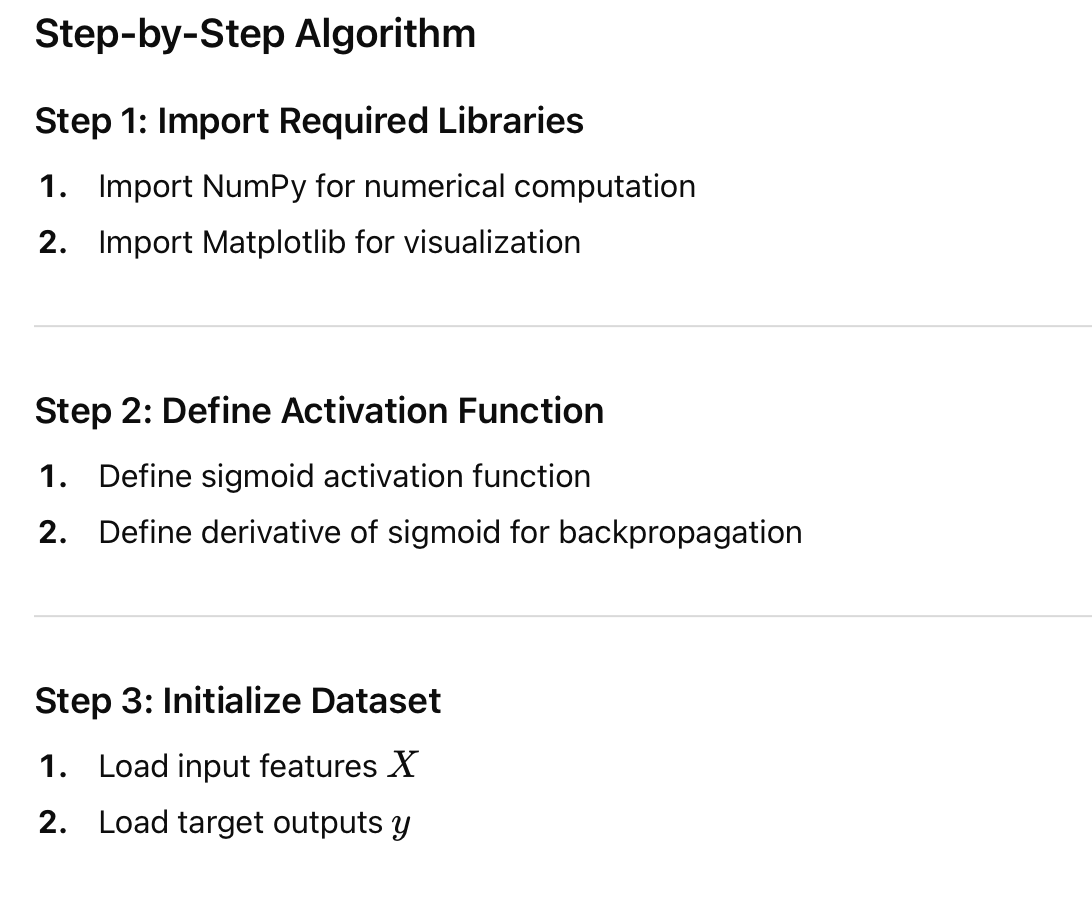
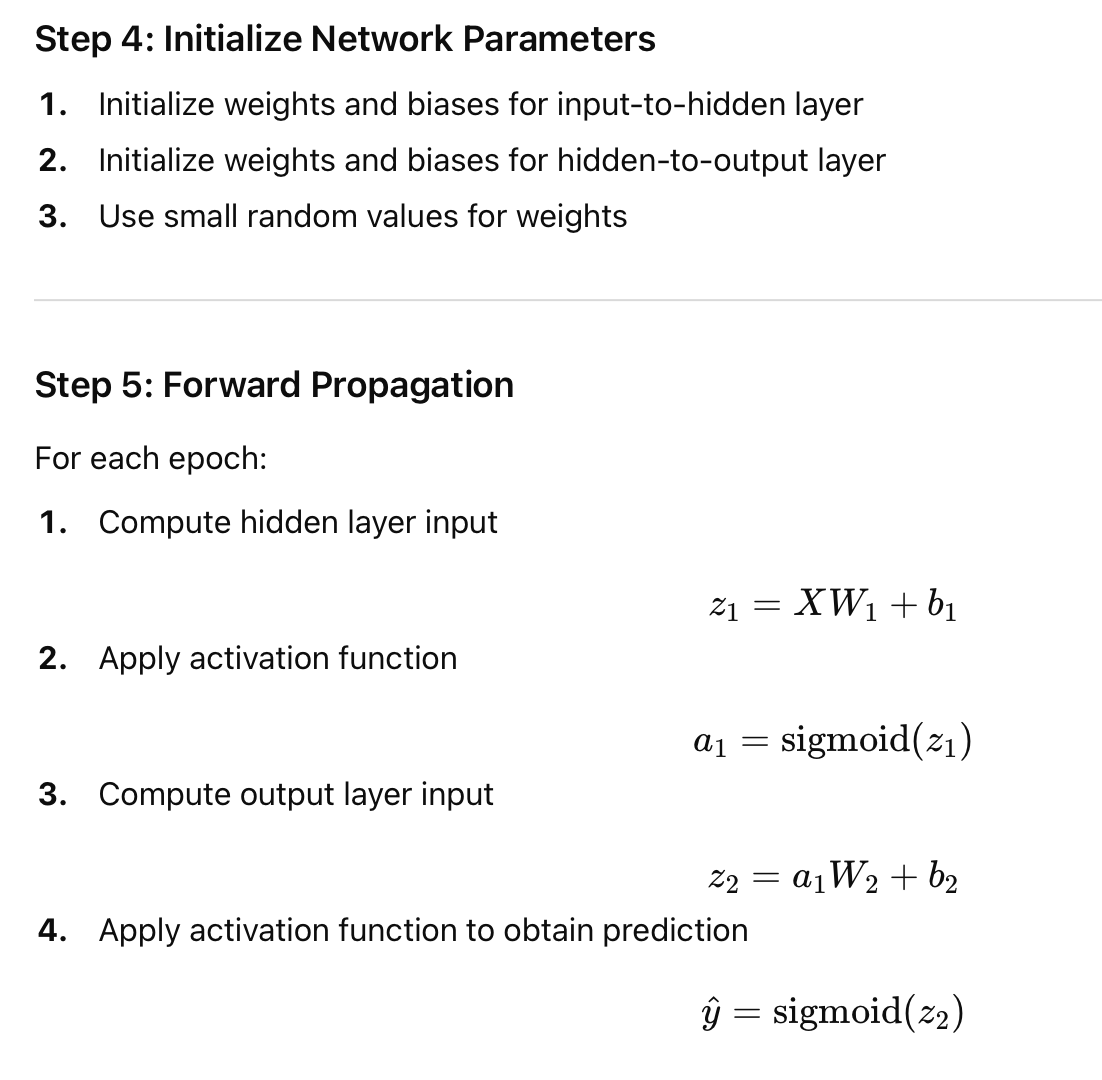
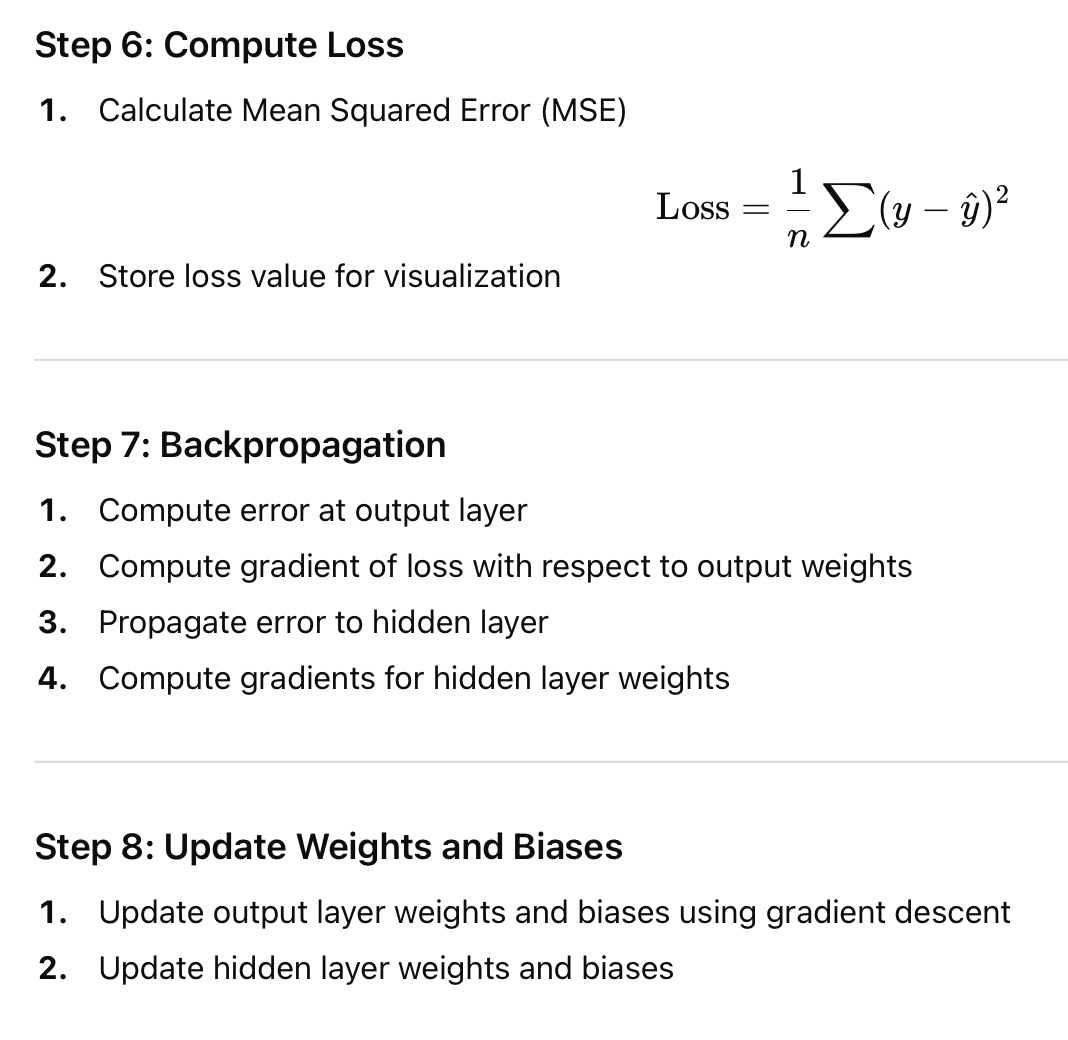
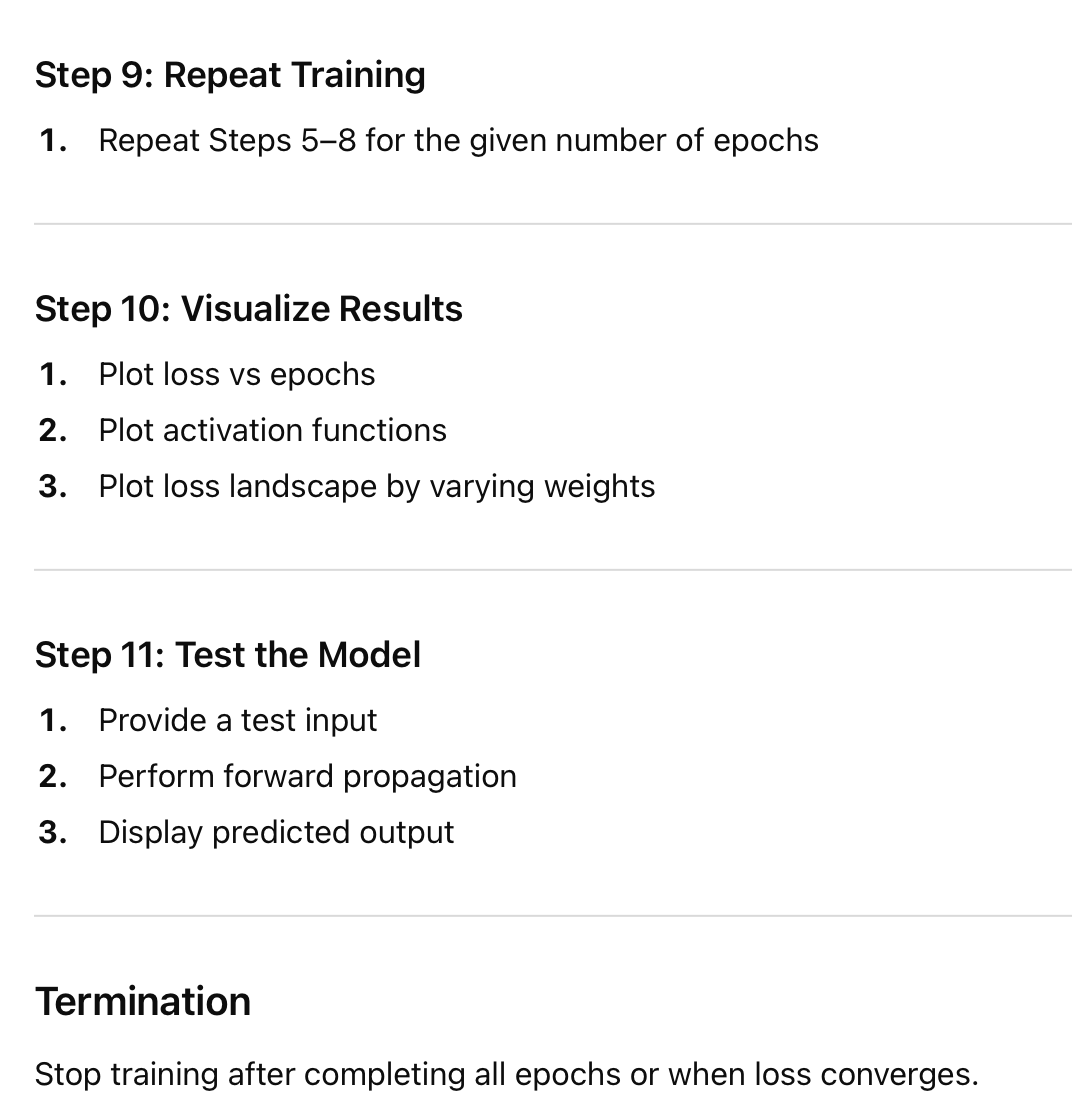

Aim of the Lab

    - Implement an MLP from scratch using NumPy

    - Visualize activation functions

    - Visualize loss landscape

    - Apply the MLP on a simple case study

In [2]:
#pip install numpy matplotlib


We solve a binary classification problem:
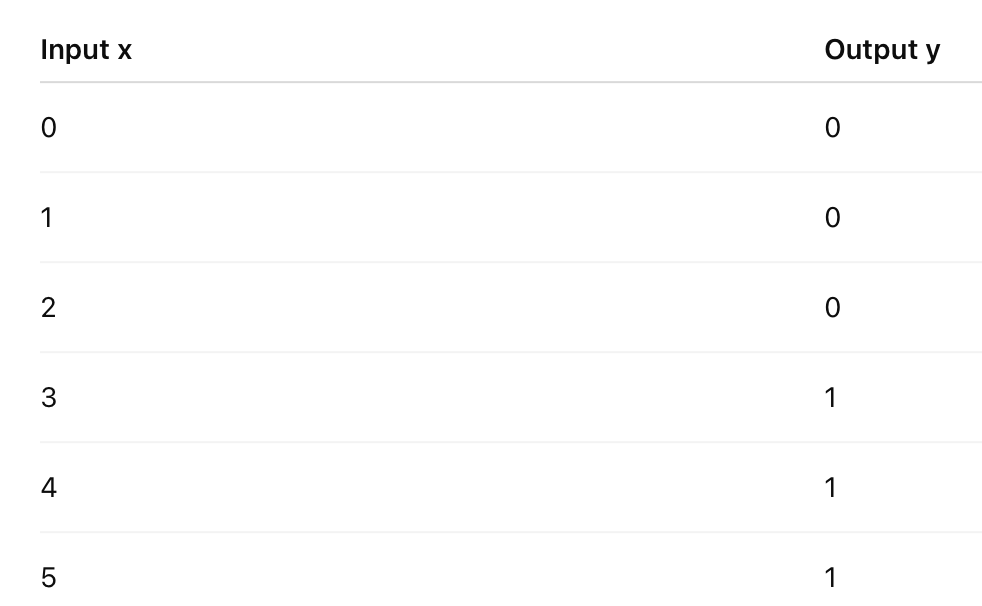

- Define Activation Functions

In [3]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))


- Sigmoid Derivative (for backpropagation)

In [4]:
def sigmoid_derivative(z):
    return z * (1 - z)


- Visualize Activation Function

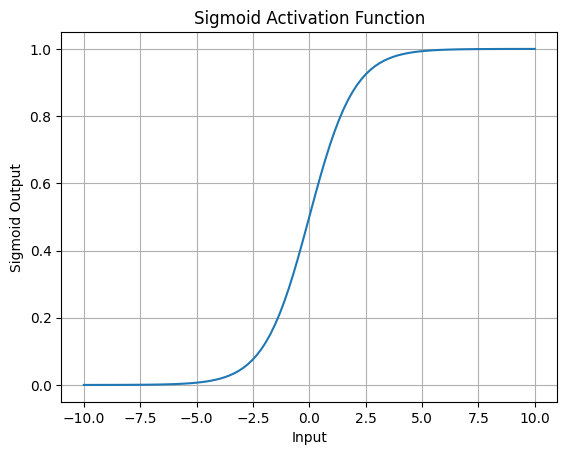

In [5]:
x = np.linspace(-10, 10, 100)
y = sigmoid(x)

plt.plot(x, y)
plt.xlabel("Input")
plt.ylabel("Sigmoid Output")
plt.title("Sigmoid Activation Function")
plt.grid()
plt.show()


- Dataset Preparation

In [6]:
X = np.array([[0],[1],[2],[3],[4],[5]], dtype=float)
y = np.array([[0],[0],[0],[1],[1],[1]], dtype=float)


- Initialize Weights and Biases

In [7]:
np.random.seed(1)

W1 = np.random.randn(1, 2)
b1 = np.zeros((1, 2))

W2 = np.random.randn(2, 1)
b2 = np.zeros((1, 1))


- Training the MLP (Forward + Backward)

In [8]:
learning_rate = 0.1
epochs = 1000
losses = []

for epoch in range(epochs):

    # Forward pass
    z1 = np.dot(X, W1) + b1
    a1 = sigmoid(z1)

    z2 = np.dot(a1, W2) + b2
    y_pred = sigmoid(z2)

    # Loss (Mean Squared Error)
    loss = np.mean((y - y_pred) ** 2)
    losses.append(loss)

    # Backpropagation
    d_output = (y - y_pred) * sigmoid_derivative(y_pred)
    d_hidden = d_output.dot(W2.T) * sigmoid_derivative(a1)

    # Update weights
    W2 += a1.T.dot(d_output) * learning_rate
    b2 += np.sum(d_output, axis=0, keepdims=True) * learning_rate

    W1 += X.T.dot(d_hidden) * learning_rate
    b1 += np.sum(d_hidden, axis=0, keepdims=True) * learning_rate


- Visualize Loss Curve

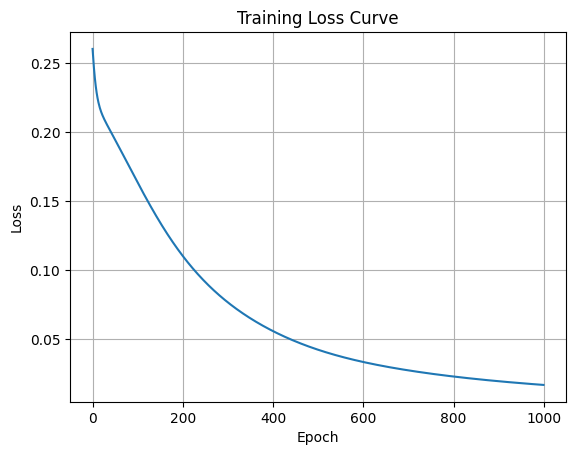

In [9]:
plt.plot(losses)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training Loss Curve")
plt.grid()
plt.show()


- Visualize Loss Landscape (Simplified)

- Testing the Model

In [12]:
test_input = np.array([[4.2]])
hidden = sigmoid(np.dot(test_input, W1) + b1)
output = sigmoid(np.dot(hidden, W2) + b2)

print("Prediction:", output)


Prediction: [[0.93499885]]
